In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

#### Functions definition

In [471]:
def read_data(path):
    activities = pd.read_csv(path + "/activities_all.csv")
    levels = pd.read_csv(path + "/levels_all.csv", skiprows = 1)
    return activities, levels

In [472]:
def process_glucose_levels(levels):
    levels.dropna(subset = ['Glukosewert-Verlauf mg/dL', 'Glukose-Scan mg/dL'], how='all', inplace=True)
    levels['Glucose-Reading mg/dL'] = levels['Glukose-Scan mg/dL'].fillna(0) + levels['Glukosewert-Verlauf mg/dL'].fillna(0)
    levels['Gerätezeitstempel'] = levels['Gerätezeitstempel'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M'))
    levels_sorted = levels.sort_values(by=['Gerätezeitstempel'], ascending=True).reset_index(drop=True)[['Gerätezeitstempel','Glucose-Reading mg/dL']]
    return levels_sorted

In [473]:
def plot_historical_glucose_levels(levels):
    plt.figure(figsize=(12, 8), dpi=80)
    levels_a_by_day = levels.groupby(lambda x: levels['Gerätezeitstempel'][x].day)
    plt.title('Glucose level evolution (Each day is represented by a color)')
    plt.xlabel('Time')
    plt.ylabel('Glucose level mg/dL')
    for name, group in levels_a_by_day:
        group['Glucose-Reading mg/dL'].plot()

In [474]:
def plot_historical_glucose_levels(levels):
    plt.figure(figsize=(12, 8), dpi=80)
    levels_a_by_day = levels.groupby(lambda x: levels['Gerätezeitstempel'][x].day)
    plt.title('Glucose level evolution (Each day is represented by a color)')
    plt.xlabel('Time')
    plt.ylabel('Glucose reading mg/dL')
    for name, group in levels_a_by_day:
        group['Glucose-Reading mg/dL'].plot()

In [475]:
MEAL_RECORD_TYPE = ['MEAL_BREAKFAST', 'MEAL_LUNCH', 'MEAL_SNACK','MEAL_DINNER']
def process_activities(activities):
    activities['timestamp_start'] = activities['timestamp_start'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%S+01:00'))
    activities = activities[activities['record_type'].isin( MEAL_RECORD_TYPE)]
    activities['timestamp_end'] = activities['timestamp_start'].apply(lambda x: x + datetime.timedelta(hours=3))
    return activities

In [476]:
def plot_glucose_level_with_respect_to_meals(activities, levels):
    max_activity_timestamp = max(activities['timestamp_end'])
    min_activity_timestamp = min(activities['timestamp_start'])

    levels = levels[levels['Gerätezeitstempel'] <= max_activity_timestamp]
    levels = levels[levels['Gerätezeitstempel'] >= min_activity_timestamp]
    levels = levels.reset_index(drop=True)

    glucose_levels_per_meal = []
    i = 0
    max_i = len(levels)
    for index, row in activities.iterrows():
        glucose_levels = []    
        while(i < max_i and levels['Gerätezeitstempel'][i] <= row['timestamp_end']):
            if (levels['Gerätezeitstempel'][i] >= row['timestamp_start']):
                glucose_levels.append(levels['Glucose-Reading mg/dL'][i])
            i += 1
        glucose_levels_per_meal.append(glucose_levels)
    activities['glucose_levels'] = glucose_levels_per_meal

    meal_activities_a_by_day = activities.groupby(lambda x: activities['timestamp_start'][x].day)
    for day, day_meals in meal_activities_a_by_day:
        plt.figure(day)
        plots = []
        for _, meal in day_meals.iterrows():
            plots.append(plt.plot(meal['glucose_levels'], label=meal['record_type']))
        plt.ylabel('Glucose level mg/dL')
        plt.legend()


#### Patient A:

In [477]:
activities_a, levels_a = read_data("una-health-data-challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa")

In [478]:
levels_a.head()

,Gerät,Seriennummer,Gerätezeitstempel,Aufzeichnungstyp,Glukosewert-Verlauf mg/dL,Glukose-Scan mg/dL,Nicht numerisches schnellwirkendes Insulin,Schnellwirkendes Insulin (Einheiten),Nicht numerische Nahrungsdaten,Kohlenhydrate (Gramm),Kohlenhydrate (Portionen),Nicht numerisches Depotinsulin,Depotinsulin (Einheiten),Notizen,Glukose-Teststreifen mg/dL,Keton mmol/L,Mahlzeiteninsulin (Einheiten),Korrekturinsulin (Einheiten),Insulin-Änderung durch Anwender (Einheiten)
0,FreeStyle LibreLink,1D48A10E-DDFB-4888-8158-026F08814832,18-02-2021 10:57,0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FreeStyle LibreLink,1D48A10E-DDFB-4888-8158-026F08814832,18-02-2021 11:12,0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FreeStyle LibreLink,1D48A10E-DDFB-4888-8158-026F08814832,18-02-2021 11:27,0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FreeStyle LibreLink,1D48A10E-DDFB-4888-8158-026F08814832,18-02-2021 11:42,0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FreeStyle LibreLink,1D48A10E-DDFB-4888-8158-026F08814832,18-02-2021 11:57,0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [479]:
levels_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Gerät                                        1199 non-null   object 
 1   Seriennummer                                 1199 non-null   object 
 2   Gerätezeitstempel                            1199 non-null   object 
 3   Aufzeichnungstyp                             1199 non-null   int64  
 4   Glukosewert-Verlauf mg/dL                    1022 non-null   float64
 5   Glukose-Scan mg/dL                           163 non-null    float64
 6   Nicht numerisches schnellwirkendes Insulin   0 non-null      float64
 7   Schnellwirkendes Insulin (Einheiten)         0 non-null      float64
 8   Nicht numerische Nahrungsdaten               0 non-null      float64
 9   Kohlenhydrate (Gramm)                        0 non-null      float64
 10  

In [480]:
levels_a[levels_a['Glukosewert-Verlauf mg/dL'].isna()==False]['Glukose-Scan mg/dL'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Glukose-Scan mg/dL, dtype: float64

In [481]:
levels_a[levels_a['Glukose-Scan mg/dL'].isna()==False]['Glukosewert-Verlauf mg/dL'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Glukosewert-Verlauf mg/dL, dtype: float64

In [482]:
processed_glucose_levels = process_glucose_levels(levels_a)
processed_glucose_levels

,Gerätezeitstempel,Glucose-Reading mg/dL
0,2021-02-14 16:50:00,53.0
1,2021-02-14 16:52:00,68.0
2,2021-02-14 16:57:00,63.0
3,2021-02-14 17:03:00,66.0
4,2021-02-14 17:07:00,72.0
...,...,...
1180,2021-02-25 16:18:00,98.0
1181,2021-02-25 16:19:00,107.0
1182,2021-02-25 16:34:00,100.0
1183,2021-02-25 16:49:00,93.0


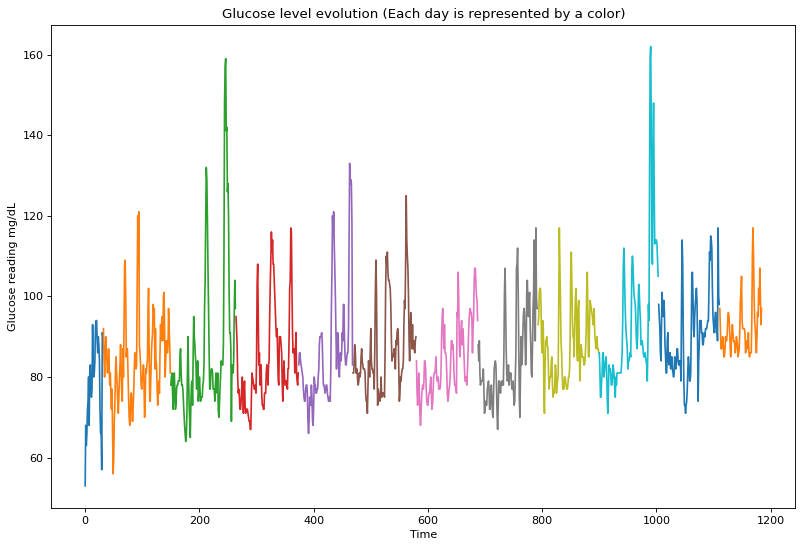

In [483]:
plot_historical_glucose_levels(processed_glucose_levels)

In [484]:
activities = process_activities(activities_a)
activities

<ipython-input-475-3236d192cf6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['timestamp_end'] = activities['timestamp_start'].apply(lambda x: x + datetime.timedelta(hours=3))


,id,user_id,record_type,description,timestamp_start,timestamp_end,payload,created,last_modified
0,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa00,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"40 g Haferflocken, 230 g Joghurt 0,3 %, 90 g B...",2021-02-15 08:30:00,2021-02-15 11:30:00,NaN,NaN,NaN
1,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa01,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"98 g M�hren-Walnuss-VK-Brot, 87 g Gurke, 55 g ...",2021-02-15 12:45:00,2021-02-15 15:45:00,NaN,NaN,NaN
2,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa02,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_SNACK,"Mandarine, Teel�ffel Erdnussmu�",2021-02-15 16:15:00,2021-02-15 19:15:00,NaN,NaN,NaN
4,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa04,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"50 g BasmatiVollkorn Reis, 20g Currypaste, 15 ...",2021-02-15 19:30:00,2021-02-15 22:30:00,NaN,NaN,NaN
5,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa05,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"230 g Joghurt, 40g Haferflocken, 65 g Apfel",2021-02-17 08:15:00,2021-02-17 11:15:00,NaN,NaN,NaN
7,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa07,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"220 g Kohlrabi, 2 Scheiben M�hren-Walnussbrot,...",2021-02-17 12:15:00,2021-02-17 15:15:00,NaN,NaN,NaN
9,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa09,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"Vollkornwrap mit 75 g Halloumi, 40 g Gew�rzgur...",2021-02-17 19:30:00,2021-02-17 22:30:00,NaN,NaN,NaN
10,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa10,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"100g Magerquark, 30 g Haferflocken",2021-02-19 08:30:00,2021-02-19 11:30:00,NaN,NaN,NaN
11,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa11,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"3 Springrolls von gestern, ohne Garnelen",2021-02-19 12:00:00,2021-02-19 15:00:00,NaN,NaN,NaN
12,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa12,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_SNACK,"50g glutenfr. Nudeln, 1 EL Oliven�l, 1 Tomate,...",2021-02-19 15:45:00,2021-02-19 18:45:00,NaN,NaN,NaN


<ipython-input-476-959257306819>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['glucose_levels'] = glucose_levels_per_meal


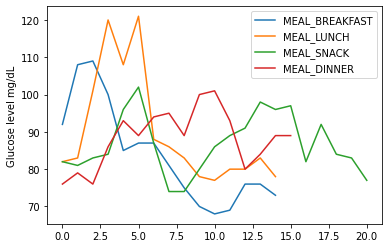

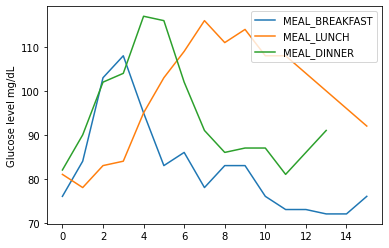

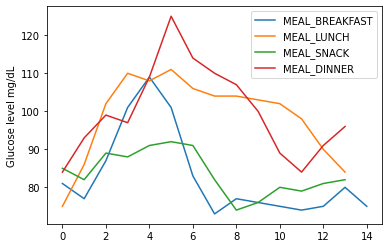

In [485]:
plot_glucose_level_with_respect_to_meals(activities, processed_glucose_levels)

#### Patient B:

In [486]:
activities_b, levels_b = read_data("una-health-data-challenge/bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb")

In [487]:
processed_glucose_levels = process_glucose_levels(levels_b)
processed_glucose_levels

,Gerätezeitstempel,Glucose-Reading mg/dL
0,2021-02-10 17:48:00,97.0
1,2021-02-10 17:58:00,95.0
2,2021-02-10 18:03:00,96.0
3,2021-02-10 18:18:00,98.0
4,2021-02-10 18:33:00,107.0
...,...,...
1322,2021-02-24 11:01:00,103.0
1323,2021-02-24 11:16:00,99.0
1324,2021-02-24 11:31:00,100.0
1325,2021-02-24 11:46:00,101.0


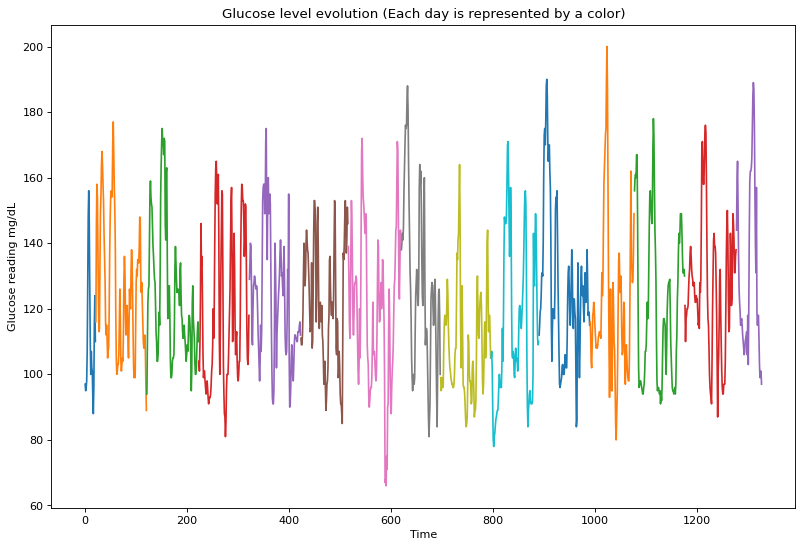

In [488]:
plot_historical_glucose_levels(processed_glucose_levels)

In [489]:
activities = process_activities(activities_b)
activities

<ipython-input-475-3236d192cf6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['timestamp_end'] = activities['timestamp_start'].apply(lambda x: x + datetime.timedelta(hours=3))


,id,user_id,record_type,description,timestamp_start,timestamp_end,payload,created,last_modified
0,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb00,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Pott Kaffe +Zucker,2021-02-19 06:30:00,2021-02-19 09:30:00,NaN,NaN,NaN
1,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb01,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,Gem�sesuppe instant,2021-02-19 07:30:00,2021-02-19 10:30:00,NaN,NaN,NaN
2,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb02,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,Gem�sesuppe instant + Gr�ner Tee ohne alles,2021-02-19 09:00:00,2021-02-19 12:00:00,NaN,NaN,NaN
4,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb04,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"Kartoffeln (150 g), Quark 250 g, Bohnen 250g ,...",2021-02-19 12:45:00,2021-02-19 15:45:00,NaN,NaN,NaN
5,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb05,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"kaffee und etwas zucker, scheibe Brot mit L�tt...",2021-02-19 15:30:00,2021-02-19 18:30:00,NaN,NaN,NaN
6,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb06,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_DINNER,currywurst und 2 scheiben Brot,2021-02-19 19:30:00,2021-02-19 22:30:00,NaN,NaN,NaN
7,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb07,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"Brot mit L�tta, Salami, 2 Kekse Prinzenrolle",2021-02-19 23:00:00,2021-02-20 02:00:00,NaN,NaN,NaN
8,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb08,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_BREAKFAST,2 Kaffee mit etwas Zucker,2021-02-21 06:00:00,2021-02-21 09:00:00,NaN,NaN,NaN
9,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb09,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_LUNCH,"1/4 Ente 250 g, etw. Rotkohl 200g, 50 mlOrange...",2021-02-21 12:45:00,2021-02-21 15:45:00,NaN,NaN,NaN
10,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbb10,bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb,MEAL_SNACK,"2 scheiben Brot100 g, 20g L�tta,50g Braunschwe...",2021-02-21 18:15:00,2021-02-21 21:15:00,NaN,NaN,NaN


<ipython-input-476-959257306819>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activities['glucose_levels'] = glucose_levels_per_meal


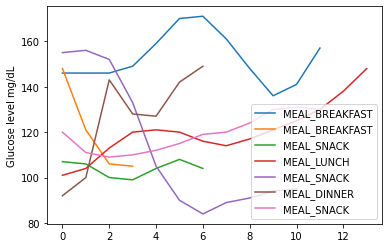

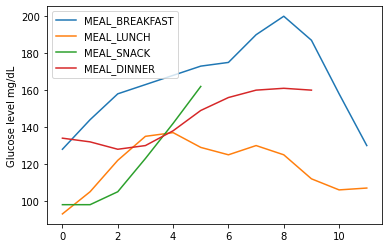

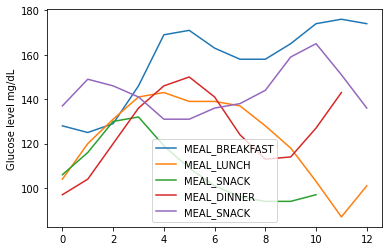

In [490]:
plot_glucose_level_with_respect_to_meals(activities, processed_glucose_levels)

#### Patient C:

In [491]:
activities_c, levels_c = read_data("una-health-data-challenge/cccccccc-cccc-cccc-cccc-cccccccccccc")

In [492]:
processed_glucose_levels = process_glucose_levels(levels_c)
processed_glucose_levels

,Gerätezeitstempel,Glucose-Reading mg/dL
0,2021-02-10 09:08:00,138.0
1,2021-02-10 09:25:00,139.0
2,2021-02-10 09:32:00,138.0
3,2021-02-10 09:40:00,139.0
4,2021-02-10 09:55:00,138.0
...,...,...
1407,2021-02-24 07:06:00,137.0
1408,2021-02-24 07:17:00,134.0
1409,2021-02-24 07:21:00,138.0
1410,2021-02-24 07:36:00,140.0


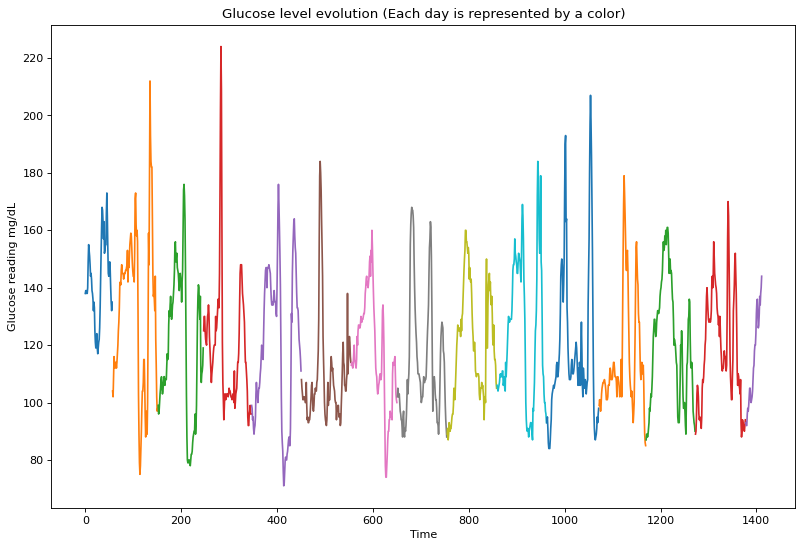

In [493]:
plot_historical_glucose_levels(processed_glucose_levels)

In [494]:
activities = process_activities(activities_c)
activities

,id,user_id,record_type,description,timestamp_start,timestamp_end,payload,created,last_modified
0,cccccccc-cccc-cccc-cccc-cccccccccc00,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_BREAKFAST,"3 Vollkorntoast, 75g Schmelzk�se, 35g Butter, ...",2021-02-17 06:00:00,2021-02-17 09:00:00,NaN,NaN,NaN
1,cccccccc-cccc-cccc-cccc-cccccccccc01,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_LUNCH,"350g Spinat,250g Kartoffeln, 2 Spiegeleier, 40...",2021-02-17 13:45:00,2021-02-17 16:45:00,NaN,NaN,NaN
2,cccccccc-cccc-cccc-cccc-cccccccccc02,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_DINNER,"1 Vollkornbrot, 25g Butter, 65g Romadur, 20g E...",2021-02-17 19:45:00,2021-02-17 22:45:00,NaN,NaN,NaN
3,cccccccc-cccc-cccc-cccc-cccccccccc03,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_LUNCH,"140g gebackener Leberk�se, 150g Erbsen-M�hren,...",2021-02-19 11:45:00,2021-02-19 14:45:00,NaN,NaN,NaN
4,cccccccc-cccc-cccc-cccc-cccccccccc04,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_DINNER,"1 Vollkornbr�tchen, 70g Leberk�se, 100g Mixed ...",2021-02-19 18:30:00,2021-02-19 21:30:00,NaN,NaN,NaN
5,cccccccc-cccc-cccc-cccc-cccccccccc05,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_LUNCH,"H�hnchenschenkel, 100g Kartoffelsalat, 50g Kop...",2021-02-21 12:45:00,2021-02-21 15:45:00,NaN,NaN,NaN
6,cccccccc-cccc-cccc-cccc-cccccccccc06,cccccccc-cccc-cccc-cccc-cccccccccccc,MEAL_DINNER,"1 Schb. Vollkorndinkelbrot, 30g Butter, 100g K...",2021-02-21 18:00:00,2021-02-21 21:00:00,NaN,NaN,NaN


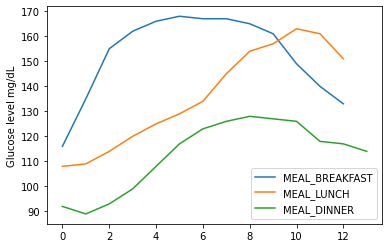

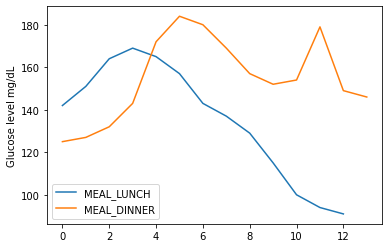

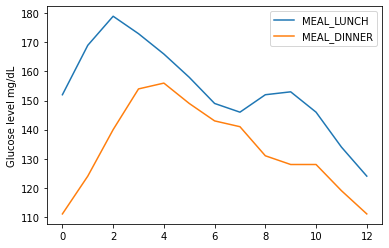

In [495]:
plot_glucose_level_with_respect_to_meals(activities, processed_glucose_levels)